In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/Aman/Downloads/archive/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Check the first few rows of the dataset
print(df.head())



                                                 App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver   
0               Art & Design   January 7, 2018               1.0.0  \
1  Art & Design;Pretend 

In [20]:
df.shape

(10829, 13)

In [4]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [5]:
# Get summary statistics of numeric columns
print(df.describe())
# Only rating column is floating type other column are object type

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


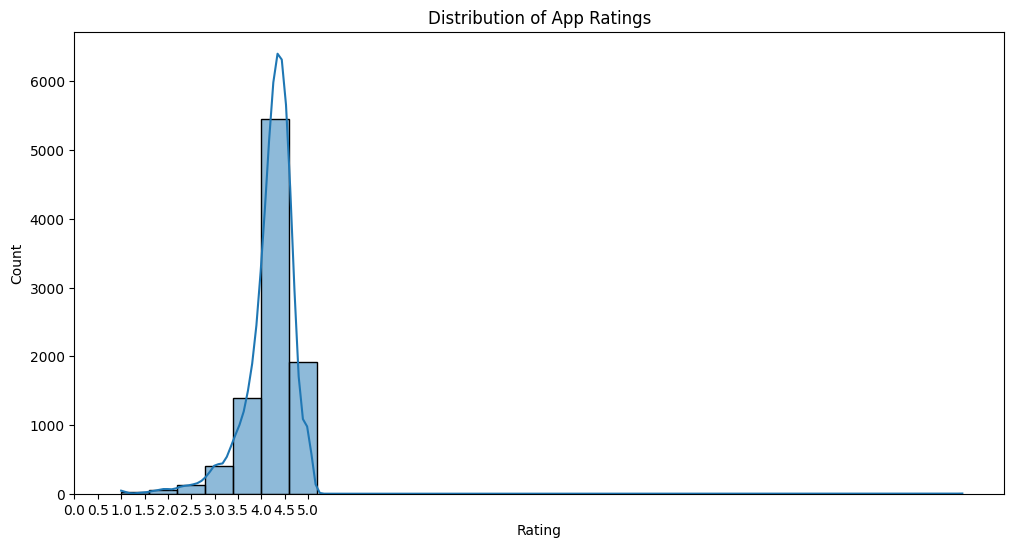

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=30,kde=True)
plt.xticks([i/2 for i in range(11)])  # Set x-axis tick marks at intervals of 0.5
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')
plt.show()


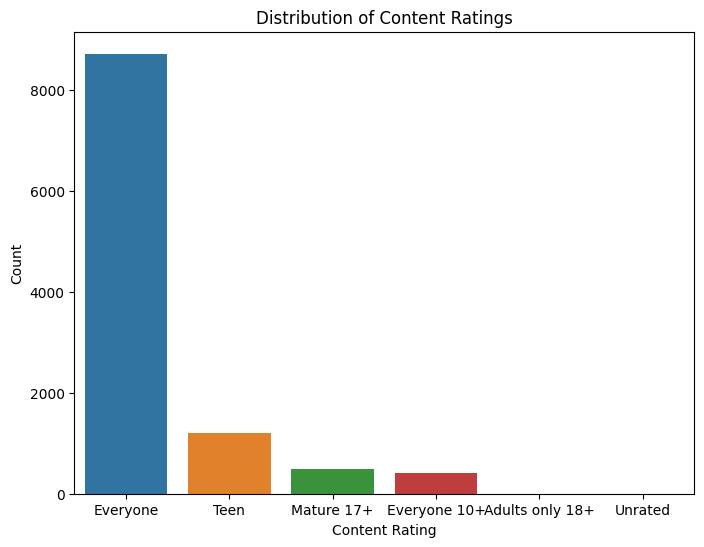

In [7]:
content_rating_counts = df['Content Rating'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts.values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings')
plt.show()


In [9]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:

df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))


0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.189143
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

In [12]:
df.dropna(how='any', inplace=True)


In [13]:
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

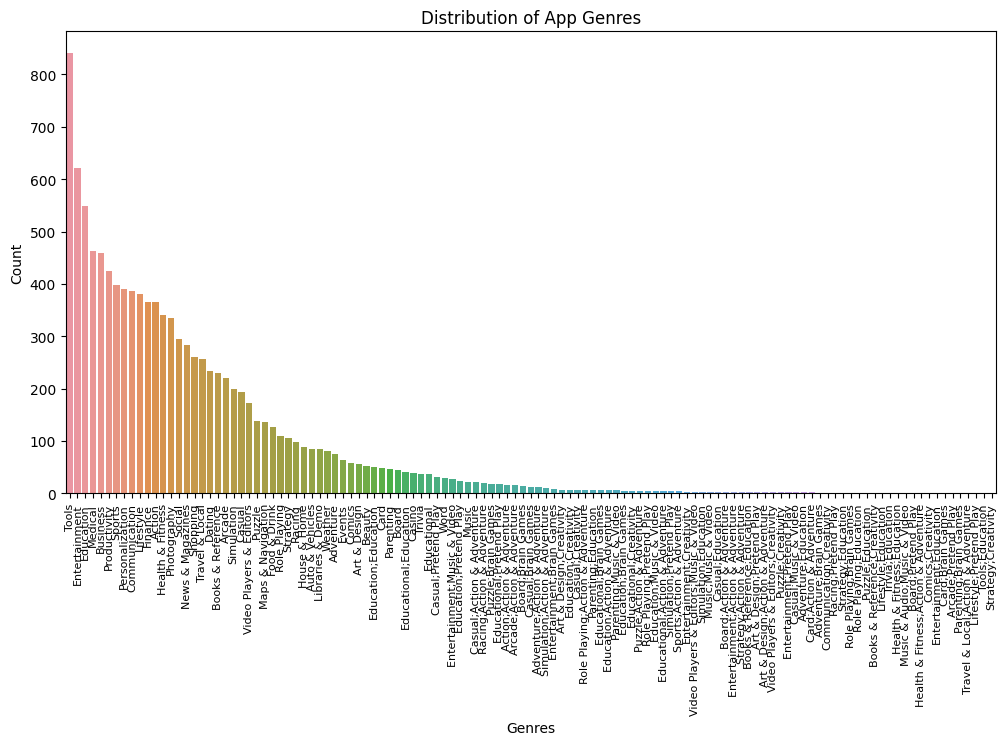

In [25]:


plt.figure(figsize=(12, 6))
sns.countplot(x='Genres', data=df, order=df['Genres'].value_counts().index)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of App Genres', fontsize=12)
plt.show()

In [26]:
df['Installs'].nunique()

20

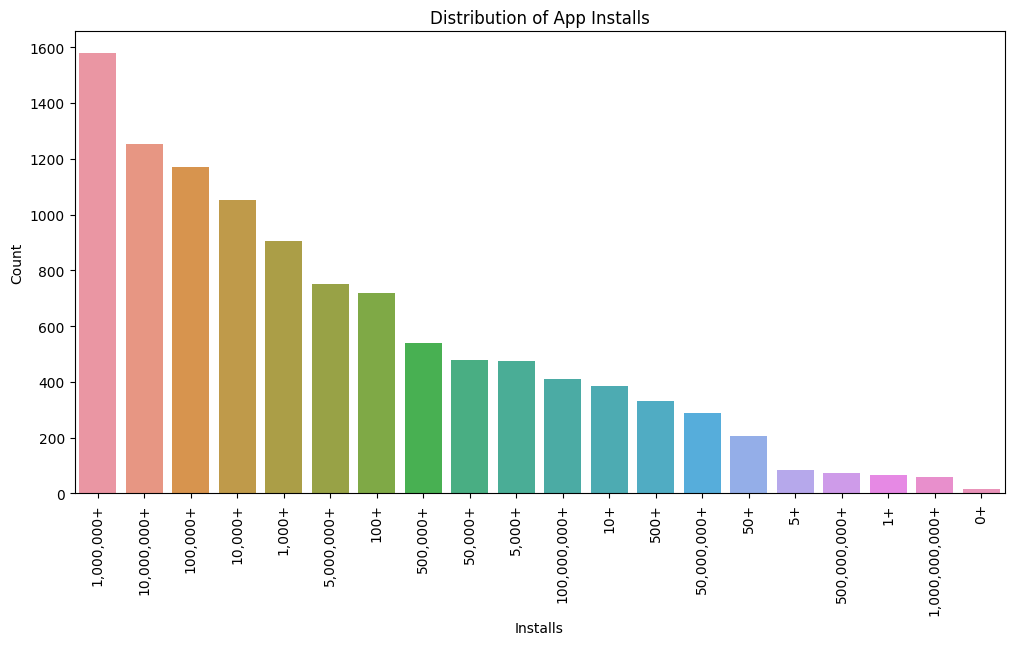

In [28]:


plt.figure(figsize=(12, 6))
sns.countplot(x='Installs', data=df, order=df['Installs'].value_counts().index)
plt.xlabel('Installs')
plt.ylabel('Count')
plt.title('Distribution of App Installs')
plt.xticks(rotation=90)
plt.show()
